In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [11]:
df = pd.read_csv("Fraud.csv")
df.shape

(6362620, 11)

In [12]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [13]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
#Checking for null Values

df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

# # Data PreProcessing

Text(0.5, 1.0, 'Box Plot for Amount column')

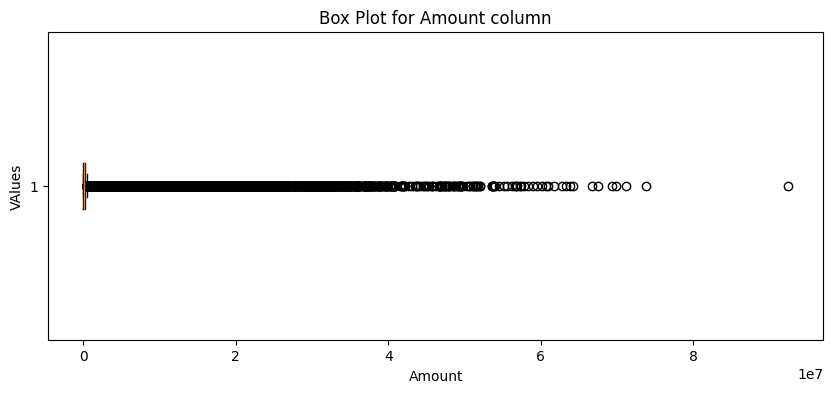

In [17]:
#OUTLIERS

plt.figure(figsize =(10,4))
plt.boxplot(df['amount'],vert = False)


plt.xlabel('Amount')
plt.ylabel('VAlues')
plt.title('Box Plot for Amount column')


Text(0.5, 1.0, 'scatter plot for Amount column')

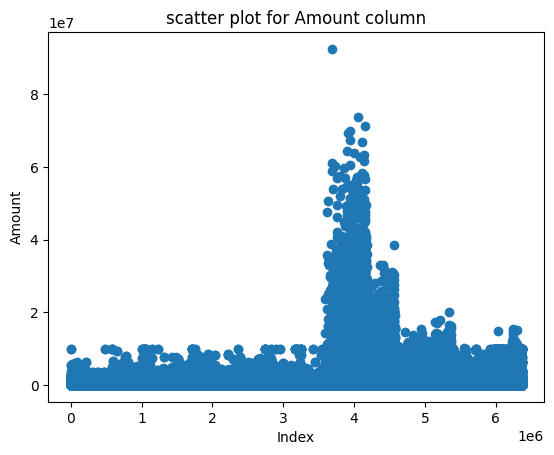

In [18]:
plt.scatter(df.index,df['amount'])
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('scatter plot for Amount column')

In [19]:
#Find Outliers using IQR method

Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)

IQR = Q3- Q1

lower_bound = Q3 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers =  df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]
print("outliers:")
print(outliers)

outliers:
         step      type      amount     nameOrig  oldbalanceOrg  \
85          1  TRANSFER  1505626.01   C926859124           0.00   
86          1  TRANSFER   554026.99  C1603696865           0.00   
88          1  TRANSFER   761507.39   C412788346           0.00   
89          1  TRANSFER  1429051.47  C1520267010           0.00   
93          1  TRANSFER   583848.46  C1839168128           0.00   
...       ...       ...         ...          ...            ...   
6362613   743  CASH_OUT  1258818.82  C1436118706     1258818.82   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
85                  0.0   C665576141        29031.00      5515763.34        0   
86                  0.0

In [20]:
outliers.shape

(338078, 11)

In [21]:
print(len(outliers[outliers.isFraud == 1]))

3854


In [22]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1 ])
percent_legit = (legit / (fraud + legit))*100
percent_fraud = (fraud / (fraud + legit))*100

print("Number of legit Transaction:",legit)
print("Number of fraud transaction :",fraud)

print("Percentage of legit Transaction:",percent_legit)
print("Percentage of fraud Transaction:",percent_fraud)

Number of legit Transaction: 6354407
Number of fraud transaction : 8213
Percentage of legit Transaction: 99.87091795518198
Percentage of fraud Transaction: 0.12908204481801522


In [ ]:
# df = df.drop(outliers.index)
# df.reset_index(drop=True,inplace = True)

## This is Clearly a imbalanced dataset as out of 8213 fraud transactions 3854 are outliers so removing outliers will make model biased

type
CASH_OUT    50.11567
TRANSFER    49.88433
Name: count, dtype: float64


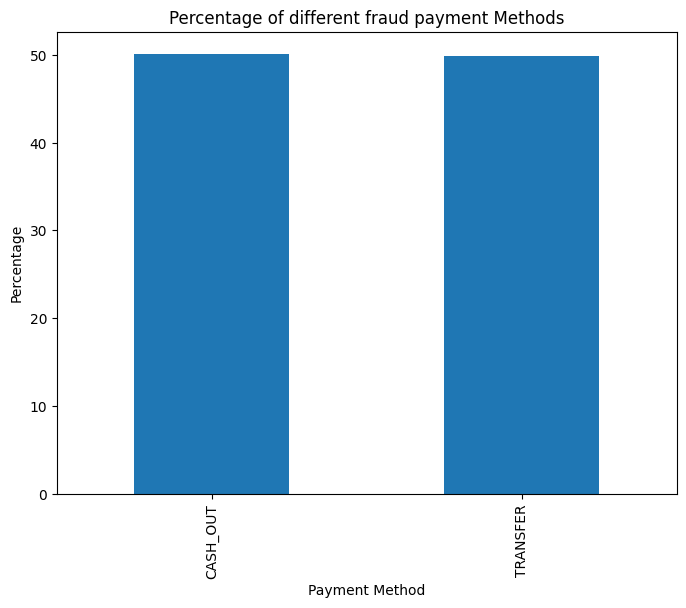

In [23]:
fraud_df = df[df['isFraud']== 1]
legit_df = df[df['isFraud']== 0]

payment_counts_fraud = fraud_df['type'].value_counts()
payment_percentages_fraud = (payment_counts_fraud/payment_counts_fraud.sum())*100

print(payment_percentages_fraud)

plt.figure(figsize =(8,6))
payment_percentages_fraud.plot(kind = 'bar')

plt.xlabel('Payment Method')
plt.ylabel('Percentage')
plt.title("Percentage of different fraud payment Methods")

plt.show()

## By The above Plots we can identify that Cashout and Transfer are the only paymrnt methods where fraud transactions occur as both share 50 -50 percent of fraud transactions


In [24]:
new_df = df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### find categorial variables and apply label encoding to convert text to numerical




In [25]:
objList = new_df.select_dtypes(include='object').columns
print(objList)



Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [26]:
#apply label encoder to above 3 columns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in objList:
    new_df[i] = label_encoder.fit_transform(new_df[i].astype(str))
    
    
print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


### Multicolinearity

<Axes: >

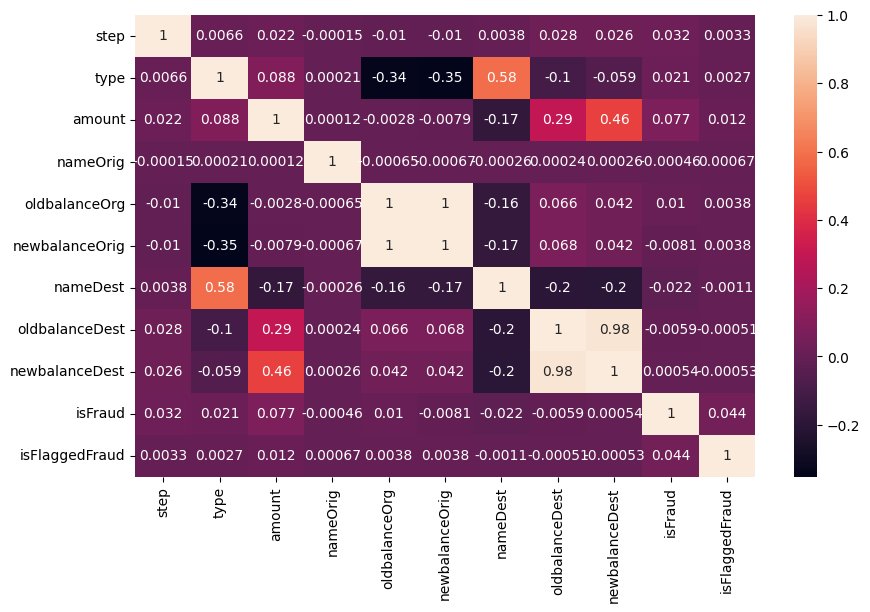

In [27]:
corr = new_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot=True)

oldbalanceOrg and NewBalanceOrg, newbalacedest and oldbalacedest have high linearity we can remove this with help of varaice inflation factor

In [43]:

!pip install statsmodels



   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
    --------------------------------------- 0.2/9.9 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.4/9.9 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/9.9 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/9.9 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.9/9.9 MB 3.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/9.9 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.9 MB 3.5 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/9.9 MB 3.5 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.9 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.9 MB 3.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.0/9.9 MB 3.6 MB/s eta 0:00:03
   -------- --------------

In [28]:
#Calc Vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(new_df):
    vif = pd.DataFrame()
    vif['variables']=new_df.columns
    vif['vif'] = [variance_inflation_factor(new_df.values,i)for i in range(new_df.shape[1])]

    return(vif)

vif_results= calc_vif(new_df)
print(vif_results)

         variables         vif
0             step    2.791610
1             type    4.467405
2           amount    4.149312
3         nameOrig    2.764234
4    oldbalanceOrg  576.803777
5   newbalanceOrig  582.709128
6         nameDest    3.300975
7   oldbalanceDest   73.349937
8   newbalanceDest   85.005614
9          isFraud    1.195305
10  isFlaggedFraud    1.002587


## creating two new columns in the DataFrame new_df based on the differences between the old and new balances for both the origin and destination accounts to deal with multicolinearity

if VIR > 5 high multicolinearity

In [29]:
new_df['Amount_Orig'] = new_df.apply(lambda x : x['oldbalanceOrg']-x['newbalanceOrig'],axis =1)
new_df['Amount_Dest'] = new_df.apply(lambda x : x['newbalanceDest']-x['oldbalanceDest'],axis =1)

In [30]:
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],axis =1)



In [31]:
#dropping irrelvant 
new_df = new_df.drop(['nameOrig','nameDest'],axis = 1)

### Calc VIR of New data frame and corr plot

In [32]:
def calc_vif(new_df):
    vif = pd.DataFrame()
    vif['variables']=new_df.columns
    vif['vif'] = [variance_inflation_factor(new_df.values,i)for i in range(new_df.shape[1])]

    return(vif)

vif_results= calc_vif(new_df)
print(vif_results)

        variables       vif
0            step  2.089916
1            type  2.039328
2          amount  3.883383
3         isFraud  1.187909
4  isFlaggedFraud  1.002535
5     Amount_Orig  1.293306
6     Amount_Dest  3.774030


<Axes: >

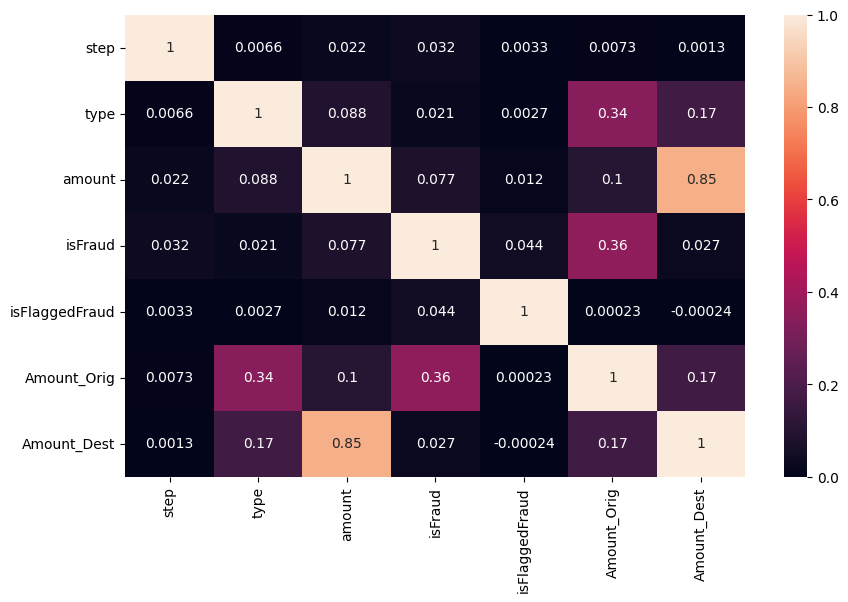

In [33]:
corr = new_df.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot=True)

In [34]:
new_df.head()

,step,type,amount,isFraud,isFlaggedFraud,Amount_Orig,Amount_Dest
0,1,3,9839.64,0,0,9839.64,0.0
1,1,3,1864.28,0,0,1864.28,0.0
2,1,4,181.00,1,0,181.00,0.0
3,1,1,181.00,1,0,181.00,-21182.0
4,1,3,11668.14,0,0,11668.14,0.0


# Building the Model

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Normalize Data

In [35]:
#Scaling the data

scaler = StandardScaler()
new_df["Normalized_Amount"]=scaler.fit_transform(new_df["amount"].values.reshape(-1,1))
new_df["Normalized_step"]=scaler.fit_transform(new_df["step"].values.reshape(-1,1))
new_df["Normalized_type"]=scaler.fit_transform(new_df["type"].values.reshape(-1,1))
new_df["Normalized_Acc_Orig"]=scaler.fit_transform(new_df["Amount_Orig"].values.reshape(-1,1))
new_df["Normalized_Acc_Dest"]=scaler.fit_transform(new_df["Amount_Dest"].values.reshape(-1,1))


In [36]:
new_df.drop(["amount","step","type","Amount_Orig","Amount_Dest"],inplace = True,axis=1)



In [37]:
new_df.head()

,isFraud,isFlaggedFraud,Normalized_Amount,Normalized_step,Normalized_type,Normalized_Acc_Orig,Normalized_Acc_Dest
0,0,0,-0.281560,-1.703042,0.952399,0.211876,-0.152896
1,0,0,-0.294767,-1.703042,0.952399,0.157490,-0.152896
2,1,0,-0.297555,-1.703042,1.693076,0.146011,-0.152896
3,1,0,-0.297555,-1.703042,-0.528954,0.146011,-0.178952
4,0,0,-0.278532,-1.703042,0.952399,0.224345,-0.152896


# Split Data into Train and test

In [39]:
Y = new_df["isFraud"]
X =new_df.drop(["isFraud"],axis = 1)

(x_train,x_test,y_train,y_test) = train_test_split(X,Y,test_size =0.2,random_state =22)

print("shape 0f x_train",x_train.shape)
print("shape 0f x_test",x_test.shape)

shape 0f x_train (5090096, 6)
shape 0f x_test (1272524, 6)


## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log_reg = LogisticRegression(C=0.001, penalty="l2")  
log_reg.fit(x_train,y_train)

y_pred = log_reg.predict(x_test)
logistic_regression_score = log_reg.score(x_test,y_test)*100


# DecisionTree

In [45]:
decision_tree = DecisionTreeClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=1)
decision_tree.fit(x_train,y_train)

y_pred_dt= decision_tree.predict(x_test)
decision_tree_score = decision_tree.score(x_test,y_test)*100

In [49]:
random_forest = RandomForestClassifier(n_estimators=50,n_jobs =-1)
random_forest.fit(x_train,y_train)

y_pred_rf = random_forest.predict(x_test)
random_forest_score = random_forest.score(x_test,y_test)*100

In [50]:
#Accuracies

print("Random forest accuracy",random_forest_score)
print("Decision tree accuracy",decision_tree_score)
print("Logistic regression accuracy",logistic_regression_score)

Random forest accuracy 99.96345844950665
Decision tree accuracy 99.94538413420887
Logistic regression accuracy 99.91230027881596


# Precision and Recall

Clasassification Report of RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.96      0.75      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.87      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

Confussion Matrix RF


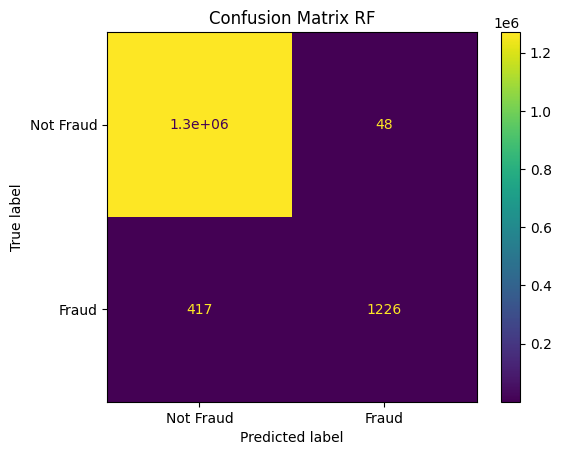

In [51]:
#classification Rf
classification_report_rf = classification_report(y_test,y_pred_rf)
print("Clasassification Report of RF")
print(classification_report_rf)

#confusuion matrix

confusion_matrix_rf = confusion_matrix(y_test,y_pred_rf.round())
print("Confussion Matrix RF")

display_labels = ["Not Fraud", "Fraud"]
matrix= ConfusionMatrixDisplay(confusion_matrix_rf,display_labels=display_labels)
matrix.plot()
plt.title('Confusion Matrix RF')
plt.show()
precision_rf= precision_score(y_test,y_pred_rf)
recall_rf = recall_score(y_test,y_pred_rf)

Clasassification Report of DT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.80      0.77      0.78      1643

    accuracy                           1.00   1272524
   macro avg       0.90      0.89      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

Confussion Matrix DT


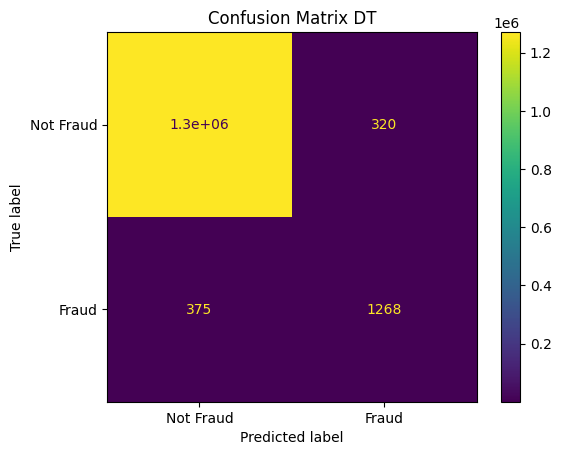

In [52]:
#classification DT
classification_report_dt = classification_report(y_test,y_pred_dt)
print("Clasassification Report of DT")
print(classification_report_dt)

#confusuion matrix

confusion_matrix_dt = confusion_matrix(y_test,y_pred_dt.round())
print("Confussion Matrix DT")

display_labels = ["Not Fraud", "Fraud"]
matrix= ConfusionMatrixDisplay(confusion_matrix_dt,display_labels=display_labels)
matrix.plot()
plt.title('Confusion Matrix DT')
plt.show()
precision_dt= precision_score(y_test,y_pred_dt)
recall_dt = recall_score(y_test,y_pred_dt)

Clasassification Report of LR
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.88      0.37      0.52      1643

    accuracy                           1.00   1272524
   macro avg       0.94      0.69      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524

Confussion Matrix RF


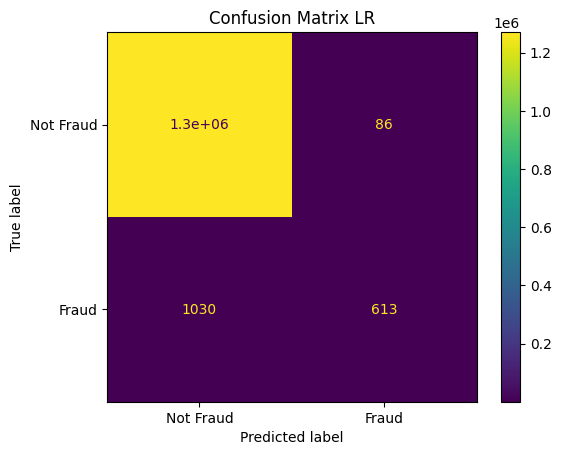

In [53]:
#classification LR
classification_report_lr = classification_report(y_test,y_pred)
print("Clasassification Report of LR")
print(classification_report_lr)

#confusuion matrix

confusion_matrix_lr = confusion_matrix(y_test,y_pred.round())
print("Confussion Matrix RF")

display_labels = ["Not Fraud", "Fraud"]
matrix= ConfusionMatrixDisplay(confusion_matrix_lr,display_labels=display_labels)
matrix.plot()
plt.title('Confusion Matrix LR')
plt.show()
precision_lr= precision_score(y_test,y_pred)
recall_lr = recall_score(y_test,y_pred)

In [54]:
algorithm = ['Random Forest','Decision Tree','Logistic Regression']
accuracy_scores = [random_forest_score,decision_tree_score,logistic_regression_score]
precision_scores = [precision_rf,precision_dt,precision_lr]
recall_scores=[recall_rf,recall_dt,recall_lr]

data={
    'Algorithm': algorithm,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}


In [55]:
comparison =pd.DataFrame(data)
print(comparison)

             Algorithm   Accuracy  Precision    Recall
0        Random Forest  99.963458   0.962323  0.746196
1        Decision Tree  99.945384   0.798489  0.771759
2  Logistic Regression  99.912300   0.876967  0.373098


# Here on comparing all 3 models decision tree model is best fit as it has both higher precision and recall

# ##Calculate coefficients from logistic regression to find key features contributing fraud transactions

In [56]:
import numpy as np

# Get the coefficients from the logistic regression model
coefficients = log_reg.coef_[0]

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort by absolute value of the coefficient
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Key factors predicting fraudulent transactions:")
print(feature_importance[['Feature', 'Coefficient']])

Key factors predicting fraudulent transactions:
               Feature  Coefficient
4  Normalized_Acc_Orig     1.485172
5  Normalized_Acc_Dest    -0.708060
2      Normalized_step     0.637295
1    Normalized_Amount    -0.243248
3      Normalized_type     0.203798
0       isFlaggedFraud     0.011988


Based on the coefficients from your logistic regression model, the key factors predicting fraudulent transactions are 

Normalized_Acc_Orig (1.485172)

A positive coefficient indicates that higher values of Normalized_Acc_Orig are associated with an increased likelihood of fraud.
This might indicate that certain account origin characteristics (like account balance changes or transaction frequency) can be significant indicators of fraudulent behavior. Accounts showing unusual activity or high value transactions are often targets for fraud.

Normalized_Acc_Dest (-0.708060)
A Negative coefficient indicates that higher values of Normalized_Acc_Dest are associated with a decreased likelihood of fraud.
This could mean that destinations with higher balances or fewer irregularities are less likely to be involved in fraudulent transactions. Fraudsters might target accounts with lower balances or less frequent transactions to avoid detection.

Normalized_step (0.637295)
A positive coefficient indicates that higher values of Normalized_step are associated with an increased likelihood of fraud.
The step feature might represent the time or sequence of transactions. Higher values could indicate transactions occurring at unusual times or in rapid succession, which are typical characteristics of fraudulent activity.

Normalized_Amount (-0.243248)
A negative coefficient indicates that higher transaction amounts are associated with a decreased likelihood of fraud.
This might seem counterintuitive, but in some contexts, fraudsters might prefer smaller, less conspicuous transactions to avoid detection. Alternatively, it might suggest that legitimate large transactions are more common in this dataset.

Normalized_type (0.203798)
A positive coefficient indicates that certain types of transactions are associated with an increased likelihood of fraud.
Certain transaction types (e.g., transfers, withdrawals) are more likely to be used in fraudulent activities. This makes sense as fraudsters often prefer specific methods to exploit vulnerabilities.

isFlaggedFraud (0.011988)
A positive but small coefficient indicates a slight association between this flag and fraud.
 This feature likely indicates whether the transaction was flagged by internal controls. While this is a direct indicator of suspected fraud, its small coefficient suggests that other features are more critical in the overall prediction model.



Based on these key factors, here are some preventive measures the company can adopt while updating its infrastructure:

Enhanced Transaction Monitoring: Implement advanced monitoring systems to flag transactions that significantly deviate from normal account behavior (Normalized_Acc_Orig, Normalized_Acc_Dest).

Time-based Anomaly Detection: Develop algorithms to detect unusual transaction timings or sequences (Normalized_step). This could include detecting transactions happening at unusual hours or in quick succession.

Transaction Type Analysis: Apply stricter scrutiny and additional verification for certain types of transactions that are prone to fraud (Normalized_type).

Dynamic Thresholds for Transaction Amounts: Instead of static limits, use dynamic thresholds that consider the typical behavior of the account holder (Normalized_Amount).

Integration of Machine Learning Models: Utilize machine learning models to continuously analyze transaction patterns and update fraud detection rules based on new data.

Real-time Alerts and Two-factor Authentication: Implement real-time alerts for suspicious transactions and enforce two-factor authentication for high-risk transactions.

To determine if the implemented actions are working following methods can be used

Pre and Post Implementation Analysis:

Compare the rate of fraudulent transactions before and after implementing the new measures.
Use statistical tests to assess the significance of any observed changes.

Continuous Monitoring and Reporting:

Set up a dashboard to monitor key metrics such as fraud rate, false positives, and transaction volume.
Regularly review these metrics to identify trends and anomalies.